# Projeto 1 - Redes Complexas
### Author: João Pedro Ramos Belmiro (9791198)
### Author : Matheus Aparecido do Carmo Alves (9791114)

## Exercício 1:
### Criar algoritmos para calcular as medidas do grafo especificado neste exercício.

O primeiro passo para a realização deste exercício é inicializar o grafo especificado. Após sua inicialização, será apresentado o grafo criado de maneira gráfica (visando facilitar a análise da rede em questão).

/home/jprbelmiro/Desktop/USP/Redes-Complexas/lista-1/proj1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


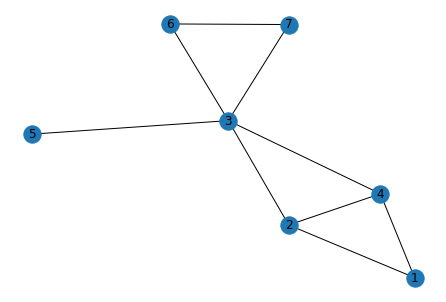

In [7]:
import networkx as nx 
import matplotlib.pyplot as plt

#creating empty graph
G = nx.Graph()

#Creating graph nodes from ex1
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(1, 4)
G.add_edge(2, 4)
G.add_edge(3, 4)
G.add_edge(3, 5)
G.add_edge(3, 6)
G.add_edge(3, 7)
G.add_edge(6, 7)

#drawing
nx.draw(G, with_labels=True)
plt.show(True)

### a) Degree distribution
Com a rede criada, podemos realizar o cálculo das distribuições de probabilidade dos graus de cada nó nesta rede. Para esta análise, um histograma é usado na visualização (apresentando a probabilidade de ocorrência de cada grau) seguindo:

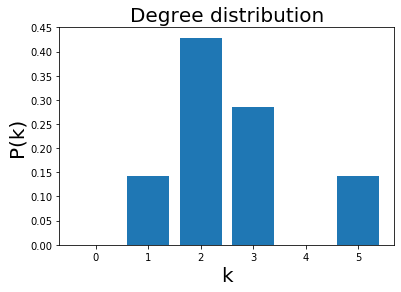

In [8]:
import numpy as np

#this function calculate the probability of each degree
#and also return a list with the possible values of degree
#for iteration
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= range(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

#ploting a histogram of the degree distribution
def hist_degree_dist(G):
    kv, P_k = degree_distribution(G)
    plt.bar(kv,P_k)
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution", fontsize=20)
    #plt.grid(True)
    plt.show(True)
    
hist_degree_dist(G)

Dos cálculos, obtemos os resultados apresentados em forma de tabela por:

In [9]:
import pandas as pd

#showing results in a table
kv, P_k = degree_distribution(G)
pd.DataFrame({'P_k': P_k})


,P_k
0,0.000000
1,0.142857
2,0.428571
3,0.285714
4,0.000000
5,0.142857


### b) Local clustering coefficient
Calculando o coefiente local de clustering de cada nó, temos:

In [10]:
def local_clust(G):
    vcc = []
    for i in G.nodes():
        vcc.append(nx.clustering(G, i))

    vcc= np.array(vcc)
    return vcc
    
vcc = local_clust(G)
C_l = pd.DataFrame({'C_i': vcc})
C_l.index = G.nodes()
display(C_l)

,C_i
1,1.000000
2,0.666667
3,0.200000
4,0.666667
5,0.000000
6,1.000000
7,1.000000


Calculando a média de cada C_i para obtermos o coeficiente local de clustering temos:

In [11]:
avc = np.average(vcc)
print("Average clustering = %3.4f" % avc)

Average clustering = 0.6476


### c) Transitivity
calculando o coeficiente global de clustering

In [12]:
def global_clust(G):
    CC = (nx.transitivity(G)) 
    return CC

CC = global_clust(G)
print("transitivity = %3.4f" % CC)

transitivity = 0.4737


### d) Distance matrix
calculating distace matrix

In [13]:
def dist_matrix(G):
    N = G.number_of_nodes()
    nodes = list(G.nodes())
    if nx.is_connected(G) == True:
        D = np.zeros(shape=(N,N), dtype=int) # D is the matrix of distances
        for (i, nodei) in zip(range(N), nodes):
            for (j, nodej) in zip(range(i+1, N), nodes[nodes.index(nodei) + 1: N]):
                if(nodei != nodej):
                    aux = nx.shortest_path(G,nodei,nodej)
                    dij = int(len(aux)-1)
                    D[i][j] = dij
                    D[j][i] = dij

        return D
    else:
        print("The gridaph has more than one connected component")
        
D = dist_matrix(G)
print("Distace Matrix :")
D_disp = pd.DataFrame(D)
D_disp.columns = D_disp.index = G.nodes()
display(D_disp)

Distace Matrix :


,1,2,3,4,5,6,7
1,0,1,2,1,3,3,3
2,1,0,1,1,2,2,2
3,2,1,0,1,1,1,1
4,1,1,1,0,2,2,2
5,3,2,1,2,0,2,2
6,3,2,1,2,2,0,1
7,3,2,1,2,2,1,0


### e) Entropy of the degree distribution
calculando a distribuição de entropia desta rede

In [14]:
import math

def shannon_entropy(G):
    kv,P_k = degree_distribution(G)
    H = 0
    for p in P_k:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy (G)
print("entropy = %3.4f" % H)

entropy = 1.8424


### f) Second moment of the degree distribution
Calculando o segundo momento da distribuição do grau <k²> para a rede 

In [15]:
def momment_of_degree_distribution(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

k2 = momment_of_degree_distribution(G,2)
print("<k^2> = %3.4f" % k2)

<k^2> = 8.0000


## Exercício 2:
Lendo a rede LesMiserables como um grafo direcional e desenhando-o com arestas proporcionais ao seu peso

/home/jprbelmiro/Desktop/USP/Redes-Complexas/lista-1/proj1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/jprbelmiro/Desktop/USP/Redes-Complexas/lista-1/proj1/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


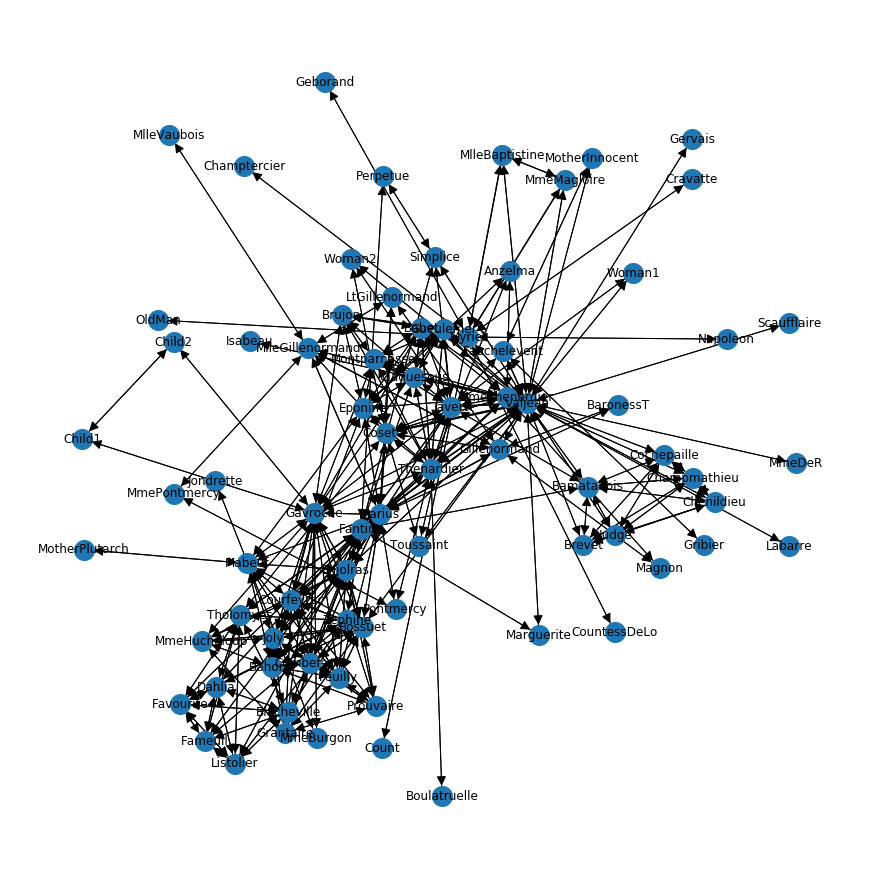

In [25]:
#reading les miserables network
LesMisNet = nx.read_gml('Networks/lesmis.gml')
LesMisNet = nx.to_directed(LesMisNet)

#listing all weights than normalizing them with 
#min-max normalization for better visualization
def min_max_1to2_norm(list):
    minimal = min(list)
    maximal = max(list)
    list = [((x - minimal) / (maximal - minimal)) + 1 for x in list]
    return list

edge_weights=[d['value'] for u,v,d in LesMisNet.edges(data=True)]
edge_weights = min_max_1to2_norm(edge_weights)

#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(LesMisNet, k =0.6)
nx.draw(LesMisNet,pos, node_size=400,arrowsize=20, width= edge_weights, with_labels=True)
plt.show(True)

Fazendo o mesmo para a rede Florida ecosystem wet network

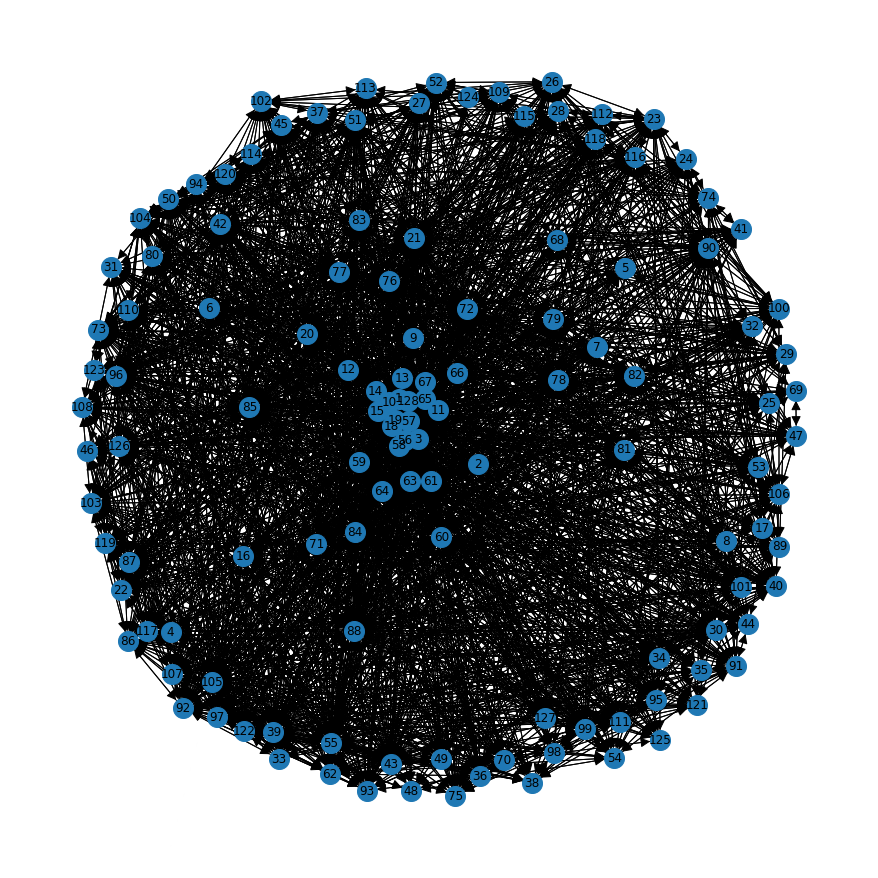

In [26]:
#reading Florida ecosystem wet network
FEW = nx.read_weighted_edgelist('Networks/eco-foodweb-baywet.edges', comments='%')
FEW = nx.to_directed(FEW)

#listing all weights than normalizing them with 
#min-max normalization for better visualization
def min_max_1to2_norm(list):
    minimal = min(list)
    maximal = max(list)
    list = [((x - minimal) / (maximal - minimal)) + 1 for x in list]
    return list

edge_weights=[d['weight'] for u,v,d in FEW.edges(data=True)]
edge_weights = min_max_1to2_norm(edge_weights)

#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(FEW, k =0.6)
nx.draw(FEW,pos, node_size=400,arrowsize=20, width=edge_weights, with_labels=True)
plt.show(True)


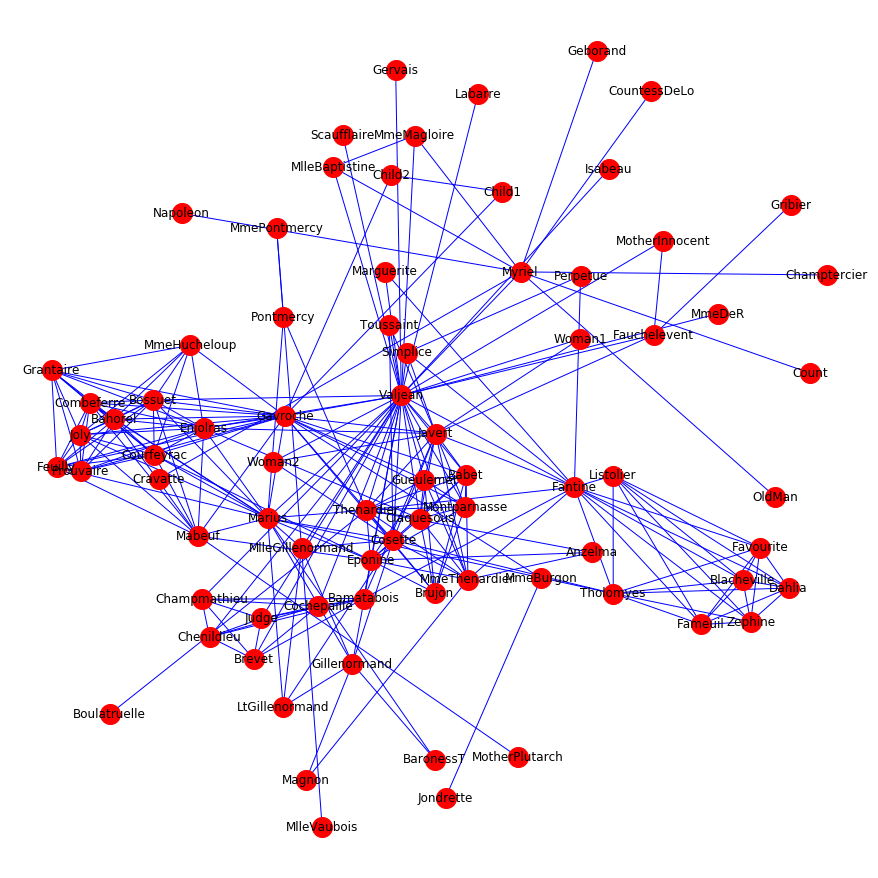

In [27]:
UW_UD_LesMisNet = nx.to_undirected(LesMisNet)

def to_unweight(G, min_weight, weight_label):
    Gnew = nx.Graph()
    for (u,v,w) in G.edges(data=True):
        if w[weight_label] >= min_weight :
            Gnew.add_edge(u, v)
    return Gnew
#unweight with threshold of 1.0 to include all edges
UW_UD_LesMisNet = to_unweight(UW_UD_LesMisNet, 1.0, 'value')

            
#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(UW_UD_LesMisNet, k =0.6)
nx.draw(UW_UD_LesMisNet,pos, node_size=400, width=1, with_labels=True, node_color = 'r', edge_color = 'b')
plt.show(True)

novamente repetindo o processo com a Florida ecosystem wet network

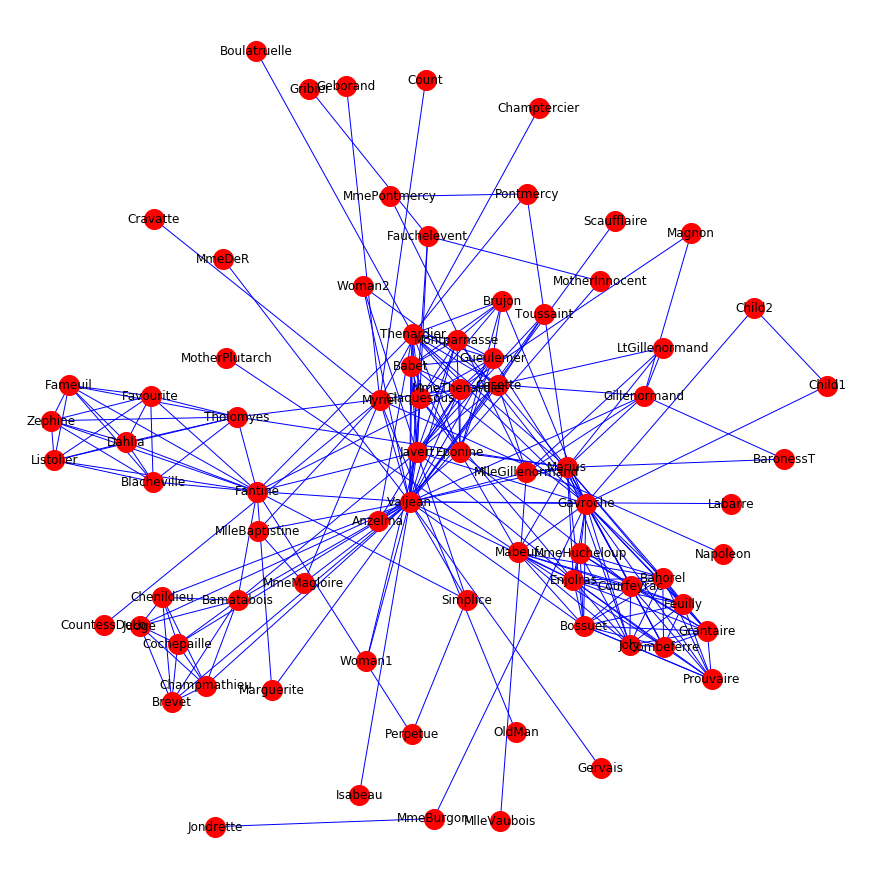

In [28]:
UW_UD_FEW = nx.to_undirected(FEW)

edges_weight = [w['weight'] for (u,v,w) in UW_UD_FEW.edges(data=True)]

q1 = (np.percentile(edges_weight, 25))
#unweight with threshold of q1 of all weights
UW_UD_FEW = to_unweight(UW_UD_FEW, q1, 'weight')

            
#drawing in a big picture for better visualization
plt.figure(1,figsize=(12,12))
pos=nx.spring_layout(UW_UD_LesMisNet, k =0.6)
nx.draw(UW_UD_LesMisNet,pos, node_size=400, width=1, with_labels=True, node_color = 'r', edge_color = 'b')
plt.show(True)

## Exercício 3:
implementando uma caminhada aleatória para a rede Les miserables

In [45]:
import random as rd

NetWork = UW_UD_LesMisNet
N = NetWork.number_of_nodes()
#first we will create our transition probability matrix P
M = nx.adjacency_matrix(NetWork)

def transition_prob_matrix(A, N):
    P = np.zeros((N,N))
    for i in range(N):
        line_sum = np.sum(A[i])
        if (line_sum > 0):
            for j in range(N):
                P[i,j] = A[i,j]/line_sum
    return P

P = transition_prob_matrix(M,N)

#now we create our random walk:
def random_walk(P, N, walk_len):
    walk = []
    top = rd.choice(range(N))
    walk.append(top)
    for i in range(walk_len - 1):
        p = rd.uniform(0,1)
        cum = 0
        for j in range(N):
            cum = cum + P[top,j]
            if cum > p:
                walk.append(j)
                top = j
                break

    return walk

walk = random_walk(P,N, 10)
print(walk)

[30, 24, 18, 30, 13, 23, 9, 14, 39, 41]


Agora vamos testar uma caminhada longa e observar o grafico de visitas x grau dos nós

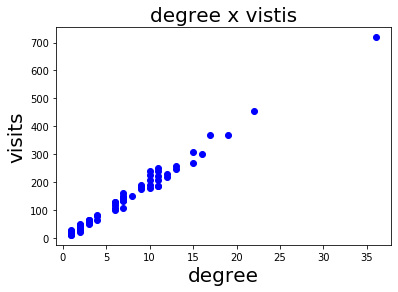

In [37]:
from collections import Counter
#setting a walk with 10000 length for a bunch of data
vis_time = Counter(random_walk(P, N, 10000))

degrees = []
visits = []
#getting the degrees from the adj matrix
#and the visits from the counter dictionary
for node in vis_time:
    degrees.append(np.sum(M[node]))
    visits.append(vis_time[node])

#ploting the graphic degree x visits
fig = plt.subplot(1,1,1)
plt.plot(degrees, visits,'bo')
plt.xlabel("degree", fontsize=20)
plt.ylabel("visits", fontsize=20)
plt.title("degree x vistis", fontsize=20)
plt.show(True)

Podemos observar um comportamento linear do gráfico, agora vamos calcular o coeficiente de person para checar essa correlação

In [40]:
from scipy.stats.stats import pearsonr

print("pearson coeficient = %f" % pearsonr(degrees, visits)[0])

pearson coeficient = 0.993695


Podemos afirmar que grau e visitas do nó são altamente correlacionados.

## Exercício 4:
Para o mesmo grafo do exercício 1, dado por:

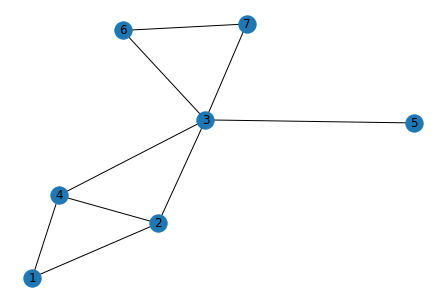

[1, 2, 3, 4, 5, 6, 7]


In [3]:
nx.draw(G, with_labels=True)
plt.show(True)
print(G.nodes())

a) Calculando as matrizes P^n para o grafo G:

In [11]:
from numpy.linalg import matrix_power

A = nx.adjacency_matrix(G)
N = G.number_of_nodes()
P = transition_prob_matrix(A, N)

n_seq = [1, 5, 10, 50, 100]
for n in n_seq:
    P_n = pd.DataFrame(matrix_power(P,n))
    P_n.columns = P_n.index = G.nodes()
    print("Matrix P^%d" % n)
    display(P_n)

Matrix P^1


,1,2,3,4,5,6,7
1,0.000000,0.500000,0.000000,0.500000,0.0,0.0,0.0
2,0.333333,0.000000,0.333333,0.333333,0.0,0.0,0.0
3,0.000000,0.200000,0.000000,0.200000,0.2,0.2,0.2
4,0.333333,0.333333,0.333333,0.000000,0.0,0.0,0.0
5,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
6,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.5
7,0.000000,0.000000,0.500000,0.000000,0.0,0.5,0.0


Matrix P^5


,1,2,3,4,5,6,7
1,0.116049,0.219506,0.193827,0.219506,0.065185,0.092963,0.092963
2,0.146337,0.167901,0.304486,0.172016,0.038765,0.085247,0.085247
3,0.077531,0.182691,0.213642,0.182691,0.078741,0.132352,0.132352
4,0.146337,0.172016,0.304486,0.167901,0.038765,0.085247,0.085247
5,0.130370,0.116296,0.393704,0.116296,0.028889,0.107222,0.107222
6,0.092963,0.127870,0.330880,0.127870,0.053611,0.117778,0.149028
7,0.092963,0.127870,0.330880,0.127870,0.053611,0.149028,0.117778


Matrix P^10


,1,2,3,4,5,6,7
1,0.118521,0.166853,0.284759,0.166853,0.051696,0.105658,0.105658
2,0.111236,0.171839,0.268590,0.171822,0.056952,0.109781,0.109781
3,0.113904,0.161154,0.290510,0.161154,0.052506,0.110386,0.110386
4,0.111236,0.171822,0.268590,0.171839,0.056952,0.109781,0.109781
5,0.103392,0.170855,0.262531,0.170855,0.060846,0.115760,0.115760
6,0.105658,0.164671,0.275965,0.164671,0.057880,0.116065,0.115088
7,0.105658,0.164671,0.275965,0.164671,0.057880,0.115088,0.116065


Matrix P^50


,1,2,3,4,5,6,7
1,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
2,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
3,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
4,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
5,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
6,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
7,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111


Matrix P^100


,1,2,3,4,5,6,7
1,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
2,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
3,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
4,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
5,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
6,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111
7,0.111111,0.166667,0.277778,0.166667,0.055556,0.111111,0.111111


Podemos ver que P^n com n -> inf, converge para uma matrix em que os elementos da coluna são inversamente proporcionais ao grau, neste caso ki/sum(k), como podemos ver a seguir:

In [8]:
vk = dict(G.degree())
vk = list(vk.values())  # we get only the degree values
vk = np.array(vk)
sum_k = np.sum(vk)

x = []
#calculando os valores esperados dos elementos de cada coluna
for node in G.nodes():
    x.append(G.degree(node)/sum_k)

#mostrando-os
Pn_j = pd.DataFrame({'Pn_j': x})
Pn_j.index = G.nodes()
display(Pn_j)

,Pn_j
1,0.111111
2,0.166667
3,0.277778
4,0.166667
5,0.055556
6,0.111111
7,0.111111


B) Calculando A³ e D para a rede Les Miserables e apresentando um scatterplot dos dados, além de calcular a correlação

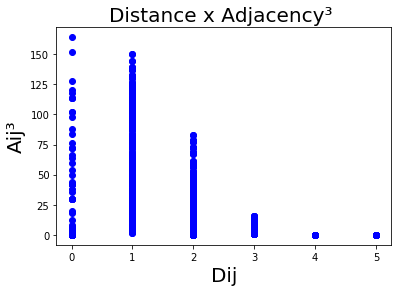

pearson coeficient = -0.615206


In [18]:
LesMisNet = nx.read_gml('Networks/lesmis.gml', label = 'id')
UW_UD_LesMisNet = to_unweight(LesMisNet, 1.0, 'value')
NetWork = UW_UD_LesMisNet

A = nx.adjacency_matrix(NetWork)
A3 = matrix_power(A.todense(),3)
D = dist_matrix(NetWork)

D = np.reshape(D,77*77)
A3 = np.reshape(A3, 77*77)

#ploting the graphic Distance x Adjacency³
fig = plt.subplot(1,1,1)
plt.plot(D, np.array(A3)[0],'bo')
plt.xlabel("Dij", fontsize=20)
plt.ylabel("Aij³", fontsize=20)
plt.title("Distance x Adjacency³ ", fontsize=20)
plt.show(True)


print("pearson coeficient = %f" % pearsonr(D, np.array(A3)[0])[0])

c) Calculando como a distância varia com a correlação

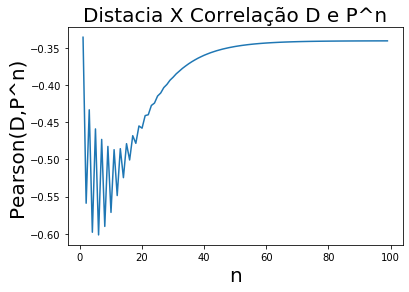

In [125]:
N = NetWork.number_of_nodes()
P = transition_prob_matrix(A, N)

cor = []
n_seq = range(1,100)
for n in n_seq:
    P_n = matrix_power(P,n)
    P_n = np.reshape(P_n, 77*77)
    cor.append(pearsonr(D, P_n)[0])

#ploting the graphic Distance X correlation between D and P^n
fig = plt.subplot(1,1,1)
plt.plot(n_seq, cor)
plt.xlabel("n", fontsize=20)
plt.ylabel("Pearson(D,P^n)", fontsize=20)
plt.title("Distância X Correlação D e P^n", fontsize=20)
plt.show(True)

### Exercício 6:
Criando funções para plotar graficos de distribuição e distribuição acumulada

In [46]:
import matplotlib.pyplot as plt
#ploting a histogram of the degree distribution
def plot_degree_dist(G):
    kv, P_k = degree_distribution(G)
    plt.plot(kv,P_k,'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("P(k)", fontsize=20)
    plt.title("Degree distribution", fontsize=20)
    plt.grid(True)
    plt.show(True)
    

def cum_degree_distribution(G):
    kv, P_k = degree_distribution(G)
    maxk = np.max(kv)
    cum_P_k = np.zeros(maxk+1)
    
    #calculating first element 
    cum_P_k[0] = P_k[0] 
    #calculating cumulatives
    for i in range(1, maxk+1):
        cum_P_k[i] = cum_P_k[i-1] + P_k[i]
    
    
    return kv, cum_P_k
    
def plot_cum_degree_dist(G):
    kv, cum_P_k = cum_degree_distribution(G)
    plt.plot(kv, cum_P_k,'bo')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("k", fontsize=20)
    plt.ylabel("Cum(P(k))", fontsize=20)
    plt.title("Cumulative Degree distribution", fontsize=20)
    plt.grid(True)
    plt.show(True)


### a) E-road network

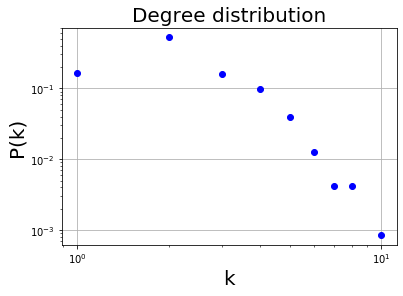

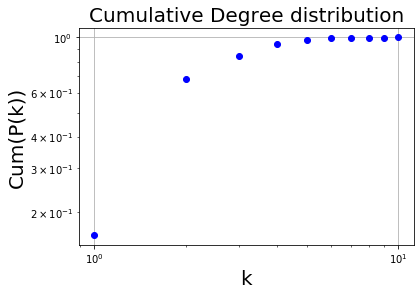

In [6]:
import networkx as nx

EuroRoad = nx.read_edgelist('Networks/subelj_euroroad/out.subelj_euroroad_euroroad', comments='%')
plot_degree_dist(EuroRoad)
plot_cum_degree_dist(EuroRoad)

### b) Facebook user-user friendships

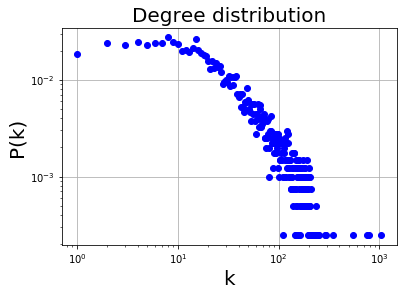

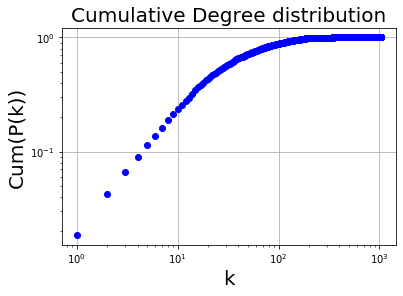

In [7]:
facebook = nx.read_edgelist('Networks/facebook_combined.txt', comments='%')
plot_degree_dist(facebook)
plot_cum_degree_dist(facebook)

### c) A coauthorship network among scientists working on network science, from 2006.

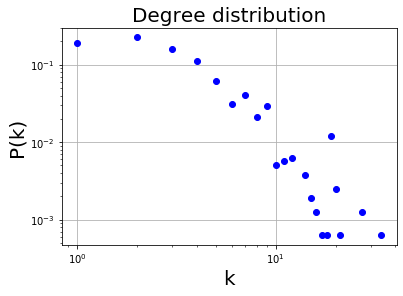

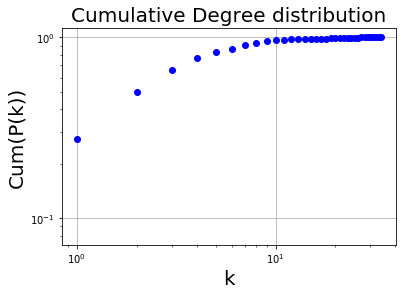

In [8]:
netscience = nx.read_gml("Networks/netscience.gml")
plot_degree_dist(netscience)
plot_cum_degree_dist(netscience)

### d) Hamsterster friendships

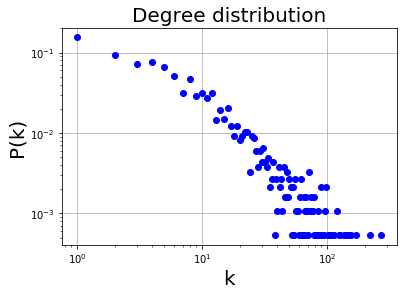

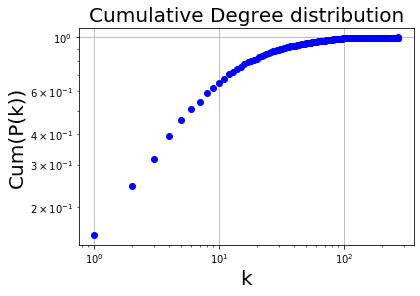

In [9]:
Hamsterster = nx.read_edgelist('Networks/petster-friendships-hamster/out.petster-friendships-hamster-uniq', comments='%')
plot_degree_dist(Hamsterster)
plot_cum_degree_dist(Hamsterster)

Podemos observar que todas as redes provavelmente são scale-free, pois todas apresentam uma f(x) e F(x) muito similar as da distribuição exponencial.

## Exercício 8

In [10]:
def shortest_path_distribution(G):
    # we get only the degree values
    D = dist_matrix(G)
    sp = D.flatten()
    maxd = np.max(sp)
    mind = np.min(sp)
    dvalues= range(0,maxd+1) # possible values of k
    Psp = np.zeros(maxd+1) # P(k)
    for d in sp:
        Psp[d] = Psp[d] + 1
    Psp = Psp/sum(Psp) # the sum of the elements of P(k) must to be equal to one
    return dvalues,Psp

def plot_short_path_dist(G):
    dv, Psp = shortest_path_distribution(G)
    plt.plot(dv,Psp,'bo')
    plt.xlabel("shortest path", fontsize=20)
    plt.ylabel("P(shortest path)", fontsize=20)
    plt.title("Shortest path distribution", fontsize=20)
    plt.grid(True)
    plt.show(True)

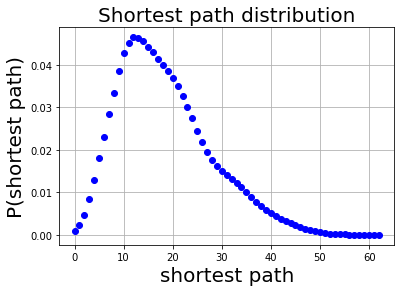

In [21]:
#obtaining the giant component from this network
EuroRoad = max(nx.connected_component_subgraphs(EuroRoad), key=len)
plot_short_path_dist(EuroRoad)

Usando uma rede do facebook menor para o exercício:

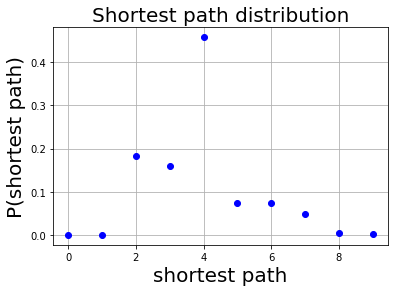

In [20]:
facebook = nx.read_edgelist('Networks/out.ego-facebook', comments = "%")
#obtaining the giant component from this network
facebook = max(nx.connected_component_subgraphs(facebook), key=len)

plot_short_path_dist(facebook)

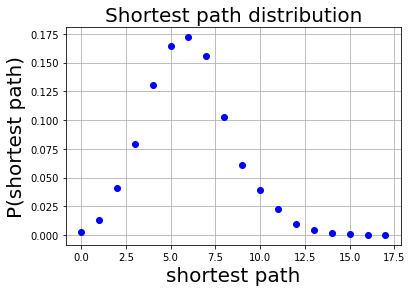

In [22]:
#obtaining the giant component from this network
netscience = max(nx.connected_component_subgraphs(netscience), key=len)
plot_short_path_dist(netscience)

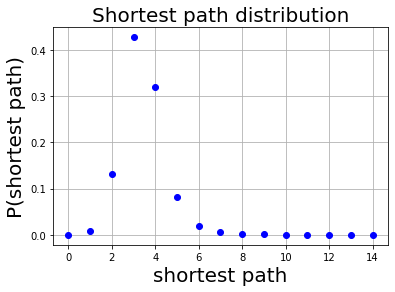

In [23]:
#obtaining the giant component from this network
Hamsterster = max(nx.connected_component_subgraphs(Hamsterster), key=len)
plot_short_path_dist(Hamsterster)

## Exercício 7 e 9:


In [24]:
import pandas as pd

def average_short_path(G):
    N = G.number_of_nodes()
    D = dist_matrix(G)
    return np.sum(D)/(N*(N-1))

def network_metrics_tables(NetWorks):
    table = {"N":[],
             "<k>":[],
             "<k²>":[],
             "<CC>":[],
             "Transitivity":[],
             "<k²>/<k>":[],
             "H":[],
             "Average shortest path":[],
             "diameter":[]}
        
    for network in NetWorks:
        G = NetWorks[network]
        
        #calculanting alfa 
        k2 = momment_of_degree_distribution(G,2)
        k = momment_of_degree_distribution(G,1)
        
        #populating table with every network metrics
        table["N"].append(G.number_of_nodes())
        table["<k>"].append(k)
        table["<k²>"].append(k2)
        table["<CC>"].append(np.average(local_clust(G)))                    
        table["Transitivity"].append(global_clust(G))
        table["<k²>/<k>"].append(k2/k)
        table["H"].append(shannon_entropy(G))
        table["Average shortest path"].append(average_short_path(G))
        table["diameter"].append(nx.diameter(G))
        
    table_df = pd.DataFrame(table, index = NetWorks.keys())
    display(table_df)

In [25]:
NetWorks = {"E-road": EuroRoad,
            "Facebook": facebook,
            "netscience": netscience,
            "Hamsterster": Hamsterster}

network_metrics_tables(NetWorks)

,N,<k>,<k²>,<CC>,Transitivity,<k²>/<k>,H,Average shortest path,diameter
E-road,1039,2.512031,7.753609,0.018906,0.035255,3.086590,2.003676,18.395146,62
Facebook,2888,2.064404,528.131579,0.027247,0.000359,255.827575,0.254405,3.867421,9
netscience,379,4.823219,38.686016,0.741231,0.430575,8.020788,3.347795,6.041867,17
Hamsterster,1788,13.955257,635.606264,0.143305,0.090369,45.546008,4.967908,3.452640,14


Conclusão 7 e 9

## Exercício 10:

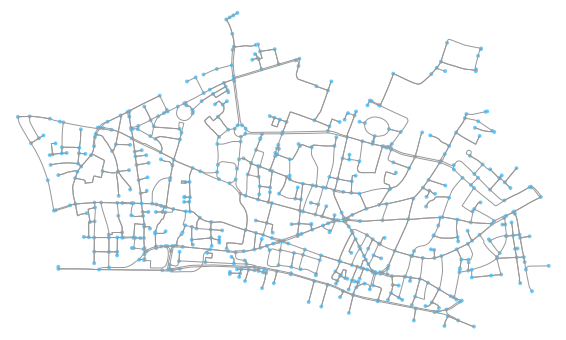

(<Figure size 1175.19x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8c9bcaf048>)

In [2]:
import osmnx as ox

LondonGeocode = "City of London, England"
LondonNetwork = ox.graph_from_place(LondonGeocode, network_type="drive", which_result = 2)
ox.plot_graph(LondonNetwork)

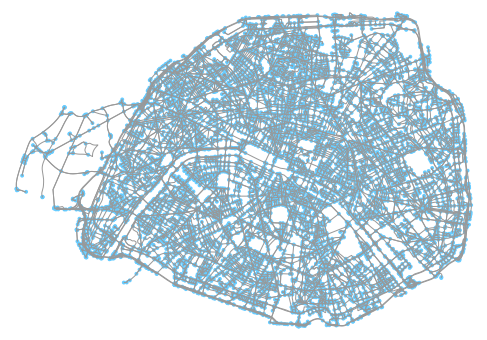

In [34]:
ParisGeocode = "Paris, France"

ParisNetwork = ox.graph_from_place(ParisGeocode, network_type="drive") 
ox.plot_graph(ParisNetwork)

ParisNetwork = nx.Graph(ParisNetwork)

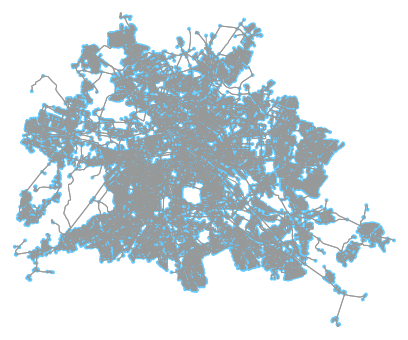

In [33]:
BerlinGeocode = "Berlin,Germany"

BerlinNetwork = ox.graph_from_place(BerlinGeocode, network_type="drive", which_result=2) 
ox.plot_graph(BerlinNetwork)

BerlinNetwork = nx.Graph(BerlinNetwork)

In [44]:
import pandas as pd


def city_metrics_tables(Cities):
    table = {"N":[],
             "<CC>":[],
             "Transitivity":[],
             "<k²>/<k>":[],
             "H":[],
             "Average shortest path":[]}
        
    for city in Cities:
        G = Cities[city]
        
        #calculanting alfa 
        k2 = momment_of_degree_distribution(G,2)
        k = momment_of_degree_distribution(G,1)
        
        #populating table with every network metrics
        table["N"].append(G.number_of_nodes())
        table["<CC>"].append(np.average(local_clust(G)))                    
        table["Transitivity"].append(global_clust(G))
        table["<k²>/<k>"].append(k2/k)
        table["H"].append(shannon_entropy(G))
        table["Average shortest path"].append(nx.average_shortest_path_length(G))
        
    table_df = pd.DataFrame(table, index = Cities.keys())
    display(table_df)

In [45]:
Cities = {LondonGeocode: LondonNetwork,
          BerlinGeocode: BerlinNetwork,
          ParisGeocode: ParisNetwork}

city_metrics_tables(Cities)

,N,<CC>,Transitivity,<k²>/<k>,H,Average shortest path
"City of London, England",692,0.054913,0.080597,2.901584,1.675027,16.909731
"Berlin,Germany",27874,0.051685,0.057846,3.258524,1.496865,67.737630
"Paris, France",10106,0.067845,0.071604,3.325746,1.396748,39.815716


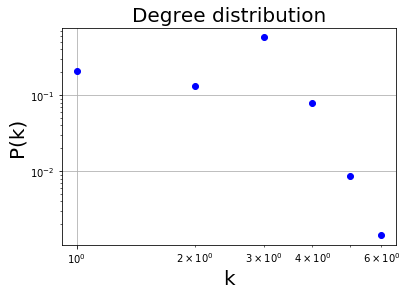

In [48]:
plot_degree_dist(LondonNetwork)

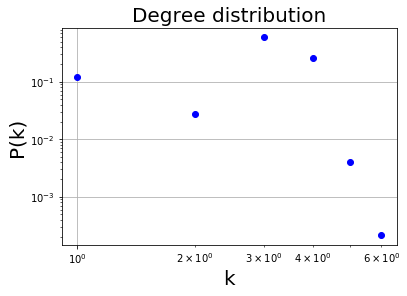

In [49]:
plot_degree_dist(BerlinNetwork)

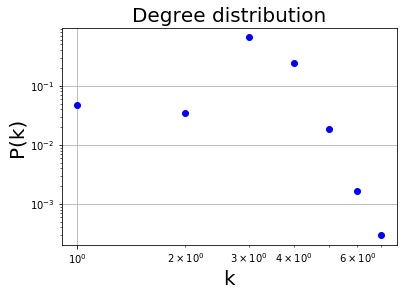

In [50]:
plot_degree_dist(ParisNetwork)